# 0. pip packages

In [1]:
!pip install pyarrow

# 1. Library & Data import 

In [2]:
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_parquet('yellow_tripdata_2022-01.parquet', engine='pyarrow') 

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


1. VendorID 
    
    > A code indicating the TPEP provider that provided the record. **1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.**
    
    > [1]
    
    
2. tpep_pickup_datetime
    
    > 미터기 시작했을 때 날짜,시간
    
    > [2016-01-01 00:12:22]
3. tpep_dropoff_datetime
    > 미터기 끝났을 때 날짜, 시간

    > [2016-01-01 00:29:14]
4. passenger_count 
    
    > 택시 하나당 승객 수 (기사 포함)
    > 
    
    > [1]
    > 
5. trip_distance 
    
    > 택시미터기에의해 기록된 총거리(마일)
    > 
    
    > [3.20]
    > 
6. RatecodeID
    
    > 도착위치같은데 뭔지 몰겠음
    > 
    
    > 1= Standard rate
    2=JFK
    3=Newark
    4=Nassau or Westchester
    5=Negotiated fare
    6=Group ride
    > 
7. store_and_fwd_flag
8. PULocationID
    
    > 택시미터기가 시작된 TLC 택시존이라는데 뭔지 몰겠음
    > 
    
    → [뉴욕에 구처럼 번호로 매겨져있음](https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc)
    
    사진파일도있음
    
9. DOLocationID 
    
    > 택시미터가 끝난 TLC 택시 존이라는데 뭔지 몰겠음
    > 
10. payment_type 
    
    > **1= Credit card
    2= Cash
    3= No charge
    4= Dispute**
    > 
    > 
    > **5= Unknown
    > 6= Voided trip**
    > 
11. fare_amount 
12. extra
13. mta_tax 
14. tip_amount 
15. tolls_amount 
16. improvement_surcharge
17. total_amount 
18. congestion_surcharge 
19. airport_fee
    
    > LaGuardia and John F. Kennedy Airports 공항에서 픽업할 때 추가로 내는 돈인듯

In [5]:
df.shape

(2463931, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

In [8]:
df['tpep_pickup_datetime']

0         2022-01-01 00:35:40
1         2022-01-01 00:33:43
2         2022-01-01 00:53:21
3         2022-01-01 00:25:21
4         2022-01-01 00:36:48
                  ...        
2463926   2022-01-31 23:36:53
2463927   2022-01-31 23:44:22
2463928   2022-01-31 23:39:00
2463929   2022-01-31 23:36:42
2463930   2022-01-31 23:46:00
Name: tpep_pickup_datetime, Length: 2463931, dtype: datetime64[ns]

# 2. Data Preprocessing

In [9]:
from datetime import datetime

df['tpep_pickup_datetime'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df['tpep_pickup_datetime']=df['tpep_pickup_datetime'].astype('|S')

In [10]:
print(df['tpep_pickup_datetime'].str.contains("2008").sum())
print(df['tpep_pickup_datetime'].str.contains("2009").sum())

6
8


In [11]:
df = df[~df['tpep_pickup_datetime'].str.contains("2008", na=False, case=False)]
df = df[~df['tpep_pickup_datetime'].str.contains("2009", na=False, case=False)]
df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])

In [12]:
df['tpep_pickup_datetime']

0         2022-01-01 00:35:40
1         2022-01-01 00:33:43
2         2022-01-01 00:53:21
3         2022-01-01 00:25:21
4         2022-01-01 00:36:48
                  ...        
2463926   2022-01-31 23:36:53
2463927   2022-01-31 23:44:22
2463928   2022-01-31 23:39:00
2463929   2022-01-31 23:36:42
2463930   2022-01-31 23:46:00
Name: tpep_pickup_datetime, Length: 2463917, dtype: datetime64[ns]

총 비용 중 너무 튀는 값이 있어서 삭제함 

In [13]:
df['total_amount'].max()

401095.62

In [14]:
df = df[df.total_amount != df.total_amount.max()]

In [15]:
df['total_amount'].max()

899.68

<AxesSubplot:xlabel='tpep_pickup_datetime', ylabel='total_amount'>

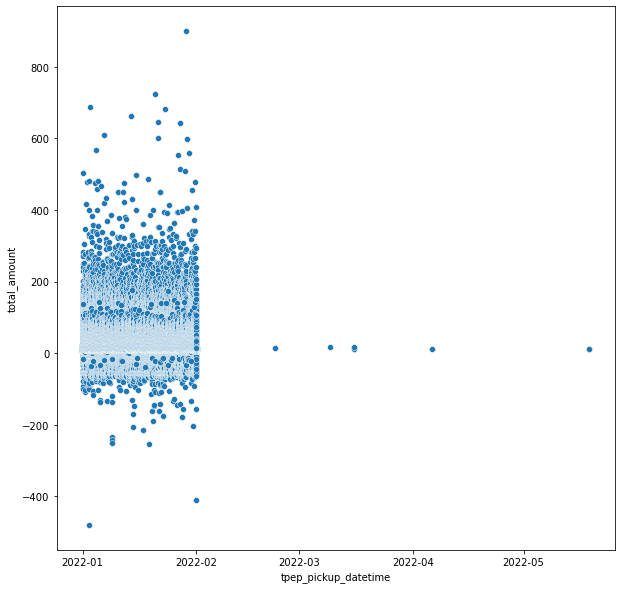

In [16]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=df, x='tpep_pickup_datetime', y = 'total_amount')

- 2022년 1월 데이터라고 적혀있는데 노이즈가 있음
- 2022-01-01 데이터만 불러오기

In [17]:
from datetime import datetime

df['tpep_pickup_datetime'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df['tpep_dropoff_datetime'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df['tpep_pickup_datetime']=df['tpep_pickup_datetime'].astype('|S')
df['tpep_dropoff_datetime']=df['tpep_dropoff_datetime'].astype('|S')

In [18]:
df = df[df['tpep_pickup_datetime'].str.contains("2022-01-01", na=False, case=False)]
df = df[df['tpep_dropoff_datetime'].str.contains("2022-01-01", na=False, case=False)]
df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']= pd.to_datetime(df['tpep_dropoff_datetime'])

In [19]:
df.shape

(62893, 19)

# 3. Data Visualization

<AxesSubplot:xlabel='tpep_pickup_datetime', ylabel='total_amount'>

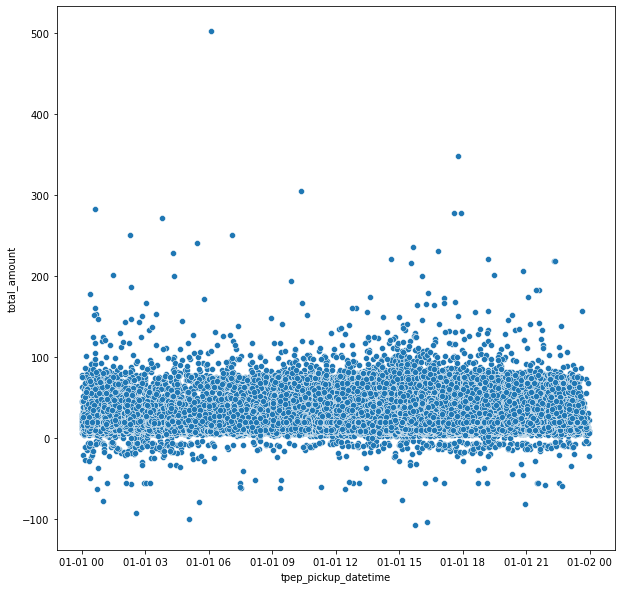

In [20]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=df, x='tpep_pickup_datetime', y = 'total_amount')

<Figure size 720x720 with 0 Axes>

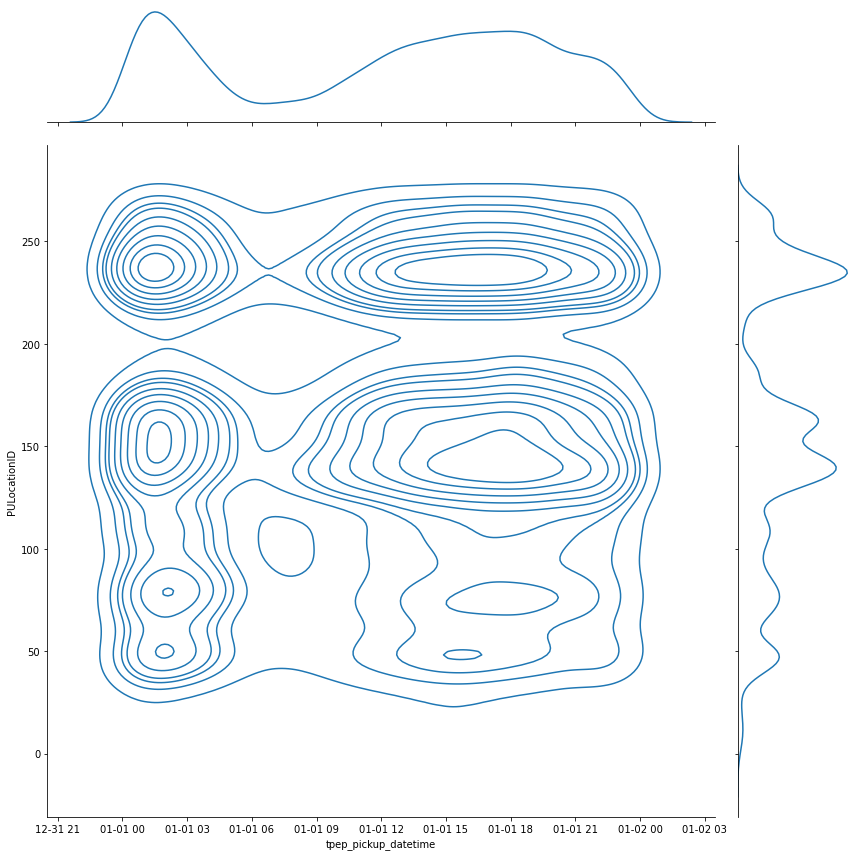

In [21]:
plt.figure(figsize=(10,10))       
sns.jointplot(x="tpep_pickup_datetime", y="PULocationID", data=df, kind="kde",height=12)
plt.show()

- x축: 탑승 시간
- y축: 탑승 장소
- 01~03시 사이 탐승객 많고 오후가 될 수록 탐승객 증가
- 150, 230 부근 탑승객이 많음

<Figure size 720x720 with 0 Axes>

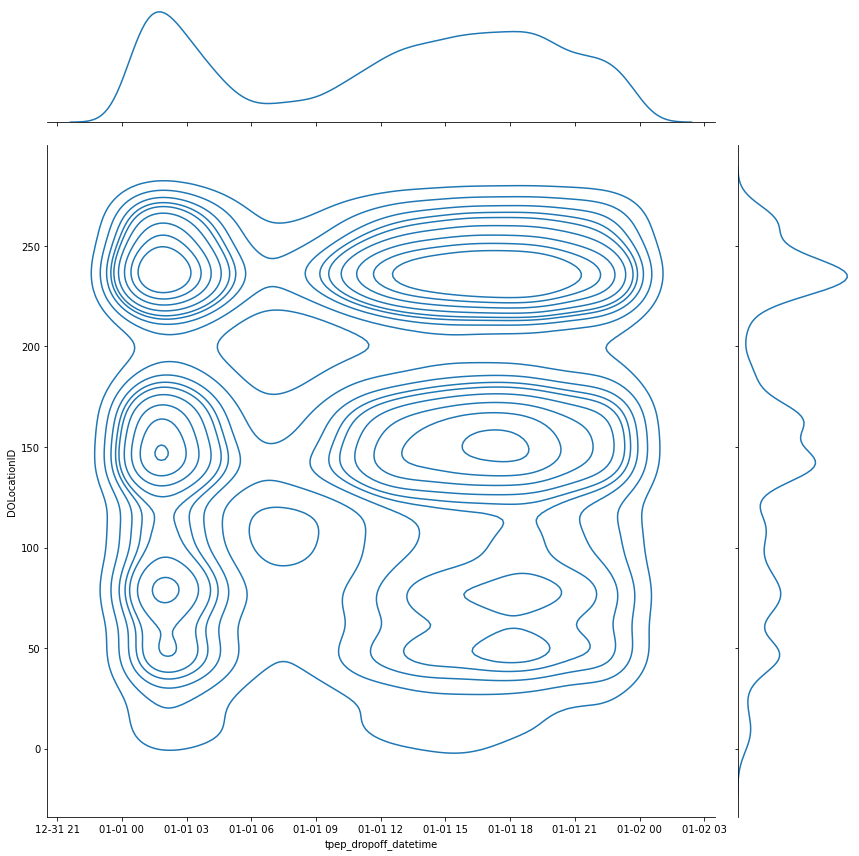

In [22]:
plt.figure(figsize=(10,10))       
sns.jointplot(x="tpep_dropoff_datetime", y="DOLocationID", data=df, kind="kde",height=12)
plt.show()

- x축: 하차 시간
- y축: 하차 장소
- 승차 시간/장소 데이터와 거의 유사한 모습

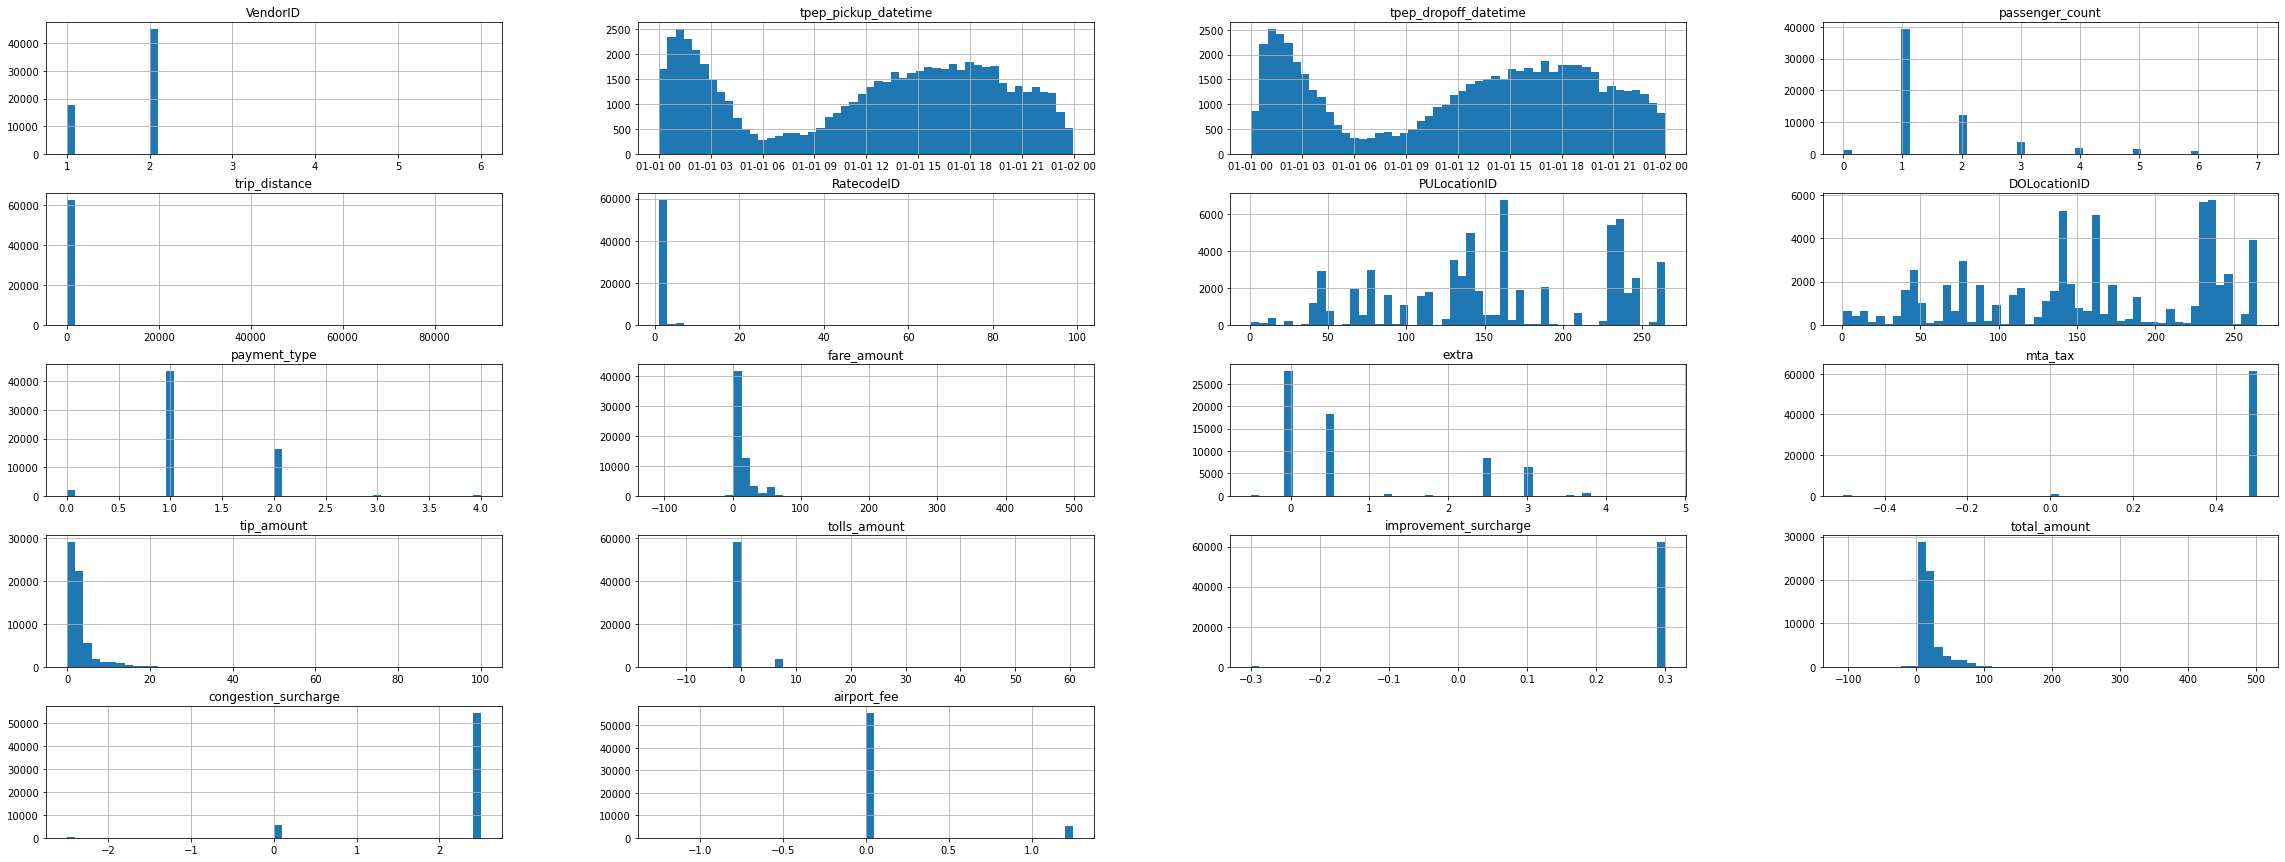

In [23]:
# 히스토그램
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins = 50, figsize = (40,15))
plt.show()

<AxesSubplot:>

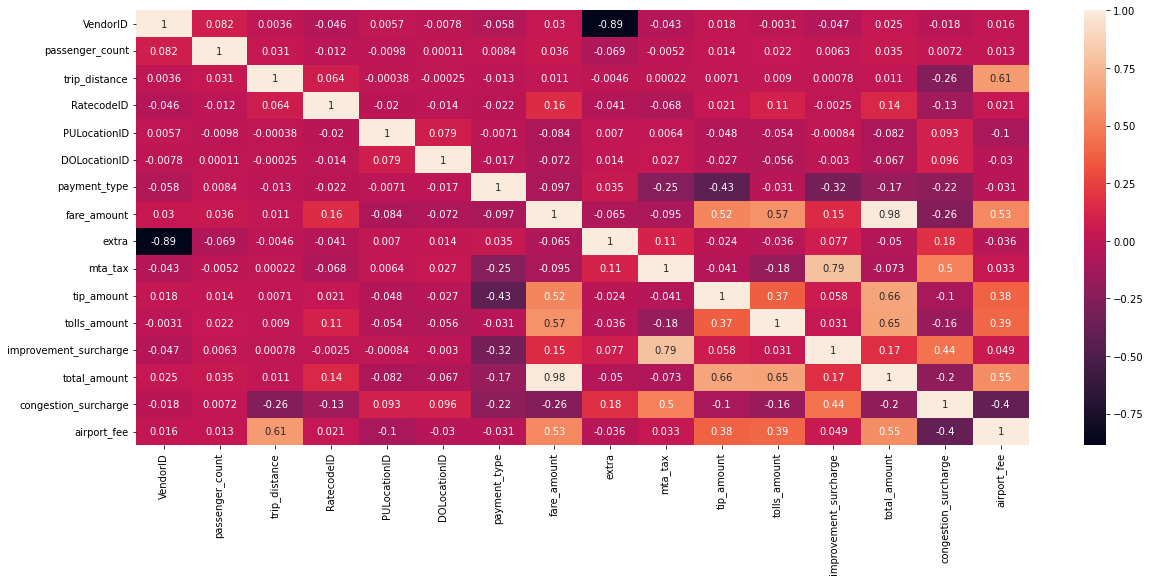

In [24]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True)

히트맵에 승차 시간과 하차 시간이 `datetime type` 이라서 표시가 안됨

`datetime type`을 `int type`으로 변환하고 기준시 `2022-01-01` 빼주기

In [25]:
import numpy as np

df['pickup_ts'] = df.tpep_pickup_datetime.values.astype(np.int64) // 10 ** 9
df['dropoff_ts'] = df.tpep_dropoff_datetime.values.astype(np.int64) // 10 ** 9


In [26]:
print(df['pickup_ts'].head())
print(df['dropoff_ts'].head())

0    1640997340
1    1640997223
2    1640998401
3    1640996721
4    1640997408
Name: pickup_ts, dtype: int64
0    1640998409
1    1640997727
2    1640998939
3    1640997323
4    1640999660
Name: dropoff_ts, dtype: int64


In [27]:
base_time_elemnet = datetime.strptime('2022-01-01', '%Y-%m-%d')
base_time_ts = int(datetime.timestamp(base_time_elemnet))
print(base_time_ts)

1640962800


In [28]:
df['pickup_ts'] = df['pickup_ts'].apply(lambda x: x - base_time_ts)
df['dropoff_ts'] = df['dropoff_ts'].apply(lambda x: x - base_time_ts)

In [29]:
print(df['pickup_ts'].head())
print(df['dropoff_ts'].head())

0    34540
1    34423
2    35601
3    33921
4    34608
Name: pickup_ts, dtype: int64
0    35609
1    34927
2    36139
3    34523
4    36860
Name: dropoff_ts, dtype: int64


<AxesSubplot:>

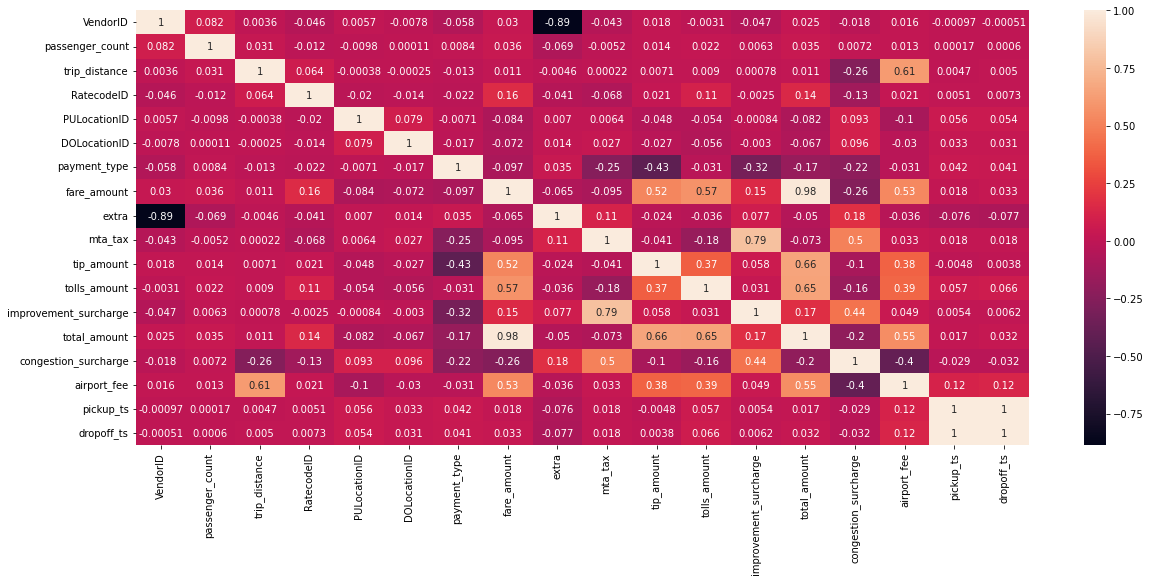

In [30]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True)

### 히트맵 분석
<b>`airport_fee` 와 연관도 높은 행</b>
- `trip_distance` (0.62)
- `fare_amount` (0.54)
- `tip_amount` (0.38)
- `tolls_amount` (0.4)
- `total_amount` (0.56)

In [31]:
df['passenger_count'].value_counts()

1.0    39398
2.0    12238
3.0     3596
4.0     1835
5.0     1630
0.0     1183
6.0      897
7.0        1
Name: passenger_count, dtype: int64

In [32]:
df['passenger_count'].isna().sum()

2115

# 4. Additional Data import (taxi zone data)

In [33]:
taxi_zone_df = pd.read_csv('taxi_zones.csv')

In [37]:
taxi_zone_df.head()

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island


In [36]:
taxi_zone_df.shape

(263, 7)

- 우리가 여기서 필요한 컬럼은 LocationID 와 borough
- LocationID 를 borough 그룹화
- yellow_tripdata 에 새로운 column 으로 borough 를 추가해 줄 것이다

In [38]:
taxi_zone_df = taxi_zone_df[['LocationID', 'borough']]

In [39]:
taxi_zone_df.head()

,LocationID,borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


# 5. Data Join (yellow_tripdata & taxi_zones)

In [52]:
taxi_zone_dict = taxi_zone_df.set_index('LocationID').T.to_dict('recodes')


/var/folders/71/7s66m40x4s50t14y3lt4mn3w0000gn/T/ipykernel_65496/2286710842.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  taxi_zone_dict = taxi_zone_df.set_index('LocationID').T.to_dict('recodes')
/var/folders/71/7s66m40x4s50t14y3lt4mn3w0000gn/T/ipykernel_65496/2286710842.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  taxi_zone_dict = taxi_zone_df.set_index('LocationID').T.to_dict('recodes')


In [54]:
taxi_zone_dict = taxi_zone_dict[0]

In [55]:
taxi_zone_dict

{1: 'EWR',
 2: 'Queens',
 3: 'Bronx',
 4: 'Manhattan',
 5: 'Staten Island',
 6: 'Staten Island',
 7: 'Queens',
 8: 'Queens',
 9: 'Queens',
 24: 'Manhattan',
 10: 'Queens',
 11: 'Brooklyn',
 12: 'Manhattan',
 13: 'Manhattan',
 18: 'Bronx',
 25: 'Brooklyn',
 14: 'Brooklyn',
 15: 'Queens',
 22: 'Brooklyn',
 23: 'Staten Island',
 16: 'Queens',
 17: 'Brooklyn',
 19: 'Queens',
 20: 'Bronx',
 21: 'Brooklyn',
 26: 'Brooklyn',
 27: 'Queens',
 28: 'Queens',
 33: 'Brooklyn',
 29: 'Brooklyn',
 31: 'Bronx',
 32: 'Bronx',
 30: 'Queens',
 34: 'Brooklyn',
 35: 'Brooklyn',
 36: 'Brooklyn',
 37: 'Brooklyn',
 38: 'Queens',
 39: 'Brooklyn',
 40: 'Brooklyn',
 41: 'Manhattan',
 45: 'Manhattan',
 46: 'Bronx',
 42: 'Manhattan',
 43: 'Manhattan',
 44: 'Staten Island',
 47: 'Bronx',
 48: 'Manhattan',
 49: 'Brooklyn',
 50: 'Manhattan',
 51: 'Bronx',
 52: 'Brooklyn',
 53: 'Queens',
 54: 'Brooklyn',
 55: 'Brooklyn',
 56: 'Queens',
 58: 'Bronx',
 59: 'Bronx',
 60: 'Bronx',
 61: 'Brooklyn',
 62: 'Brooklyn',
 63: 'Br

In [56]:
updateSerPU = df['PULocationID'].map(taxi_zone_dict)
updateSerDO = df['DOLocationID'].map(taxi_zone_dict)


In [57]:
print(updateSerDO.head())
print(updateSerPU.head())

0    Manhattan
1    Manhattan
2    Manhattan
3    Manhattan
4    Manhattan
Name: DOLocationID, dtype: object
0    Manhattan
1    Manhattan
2    Manhattan
3    Manhattan
4    Manhattan
Name: PULocationID, dtype: object


In [58]:
updateSerDO.value_counts()

Manhattan        53923
Queens            4052
Brooklyn          3240
Bronx              559
EWR                301
Staten Island       17
Name: DOLocationID, dtype: int64

In [59]:
updateSerPU.value_counts()

Manhattan        55256
Queens            6053
Brooklyn           726
Bronx               93
EWR                 43
Staten Island        1
Name: PULocationID, dtype: int64

In [76]:
updateSerPU.isna().sum()

721

In [60]:
df['PUBorough'] = updateSerPU
df['DOBorough'] = updateSerDO

In [62]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_ts,dropoff_ts,PUBorough,DOBorough
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,3.65,0.0,0.3,21.95,2.5,0.0,34540,35609,Manhattan,Manhattan
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,4.00,0.0,0.3,13.30,0.0,0.0,34423,34927,Manhattan,Manhattan
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,1.76,0.0,0.3,10.56,0.0,0.0,35601,36139,Manhattan,Manhattan
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.00,0.0,0.3,11.80,2.5,0.0,33921,34523,Manhattan,Manhattan
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,3.00,0.0,0.3,30.30,2.5,0.0,34608,36860,Manhattan,Manhattan


In [77]:
df['PUBoroughID'], unique = pd.factorize(updateSerPU) 
df['DOBoroughID'], unique = pd.factorize(updateSerDO) 

In [78]:
print(df['PUBoroughID'].value_counts())
print(df['DOBoroughID'].value_counts())

 0    55256
 1     6053
 2      726
-1      721
 3       93
 4       43
 5        1
Name: PUBoroughID, dtype: int64
 0    53923
 1     4052
 2     3240
-1      801
 3      559
 5      301
 4       17
Name: DOBoroughID, dtype: int64


# 6. Visualization pickup & dropoff with time

In [79]:
yellow_taxi_JAN_time_n_pos_df = df[['PULocationID','DOLocationID','pickup_ts','dropoff_ts','PUBorough','DOBorough','PUBoroughID','DOBoroughID']]

In [83]:
yellow_taxi_JAN_time_n_pos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62893 entries, 0 to 2394550
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PULocationID  62893 non-null  int64 
 1   DOLocationID  62893 non-null  int64 
 2   pickup_ts     62893 non-null  int64 
 3   dropoff_ts    62893 non-null  int64 
 4   PUBorough     62172 non-null  object
 5   DOBorough     62092 non-null  object
 6   PUBoroughID   62893 non-null  int64 
 7   DOBoroughID   62893 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.3+ MB


In [80]:
yellow_taxi_JAN_time_n_pos_df.head()

,PULocationID,DOLocationID,pickup_ts,dropoff_ts,PUBorough,DOBorough,PUBoroughID,DOBoroughID
0,142,236,34540,35609,Manhattan,Manhattan,0,0
1,236,42,34423,34927,Manhattan,Manhattan,0,0
2,166,166,35601,36139,Manhattan,Manhattan,0,0
3,114,68,33921,34523,Manhattan,Manhattan,0,0
4,68,163,34608,36860,Manhattan,Manhattan,0,0


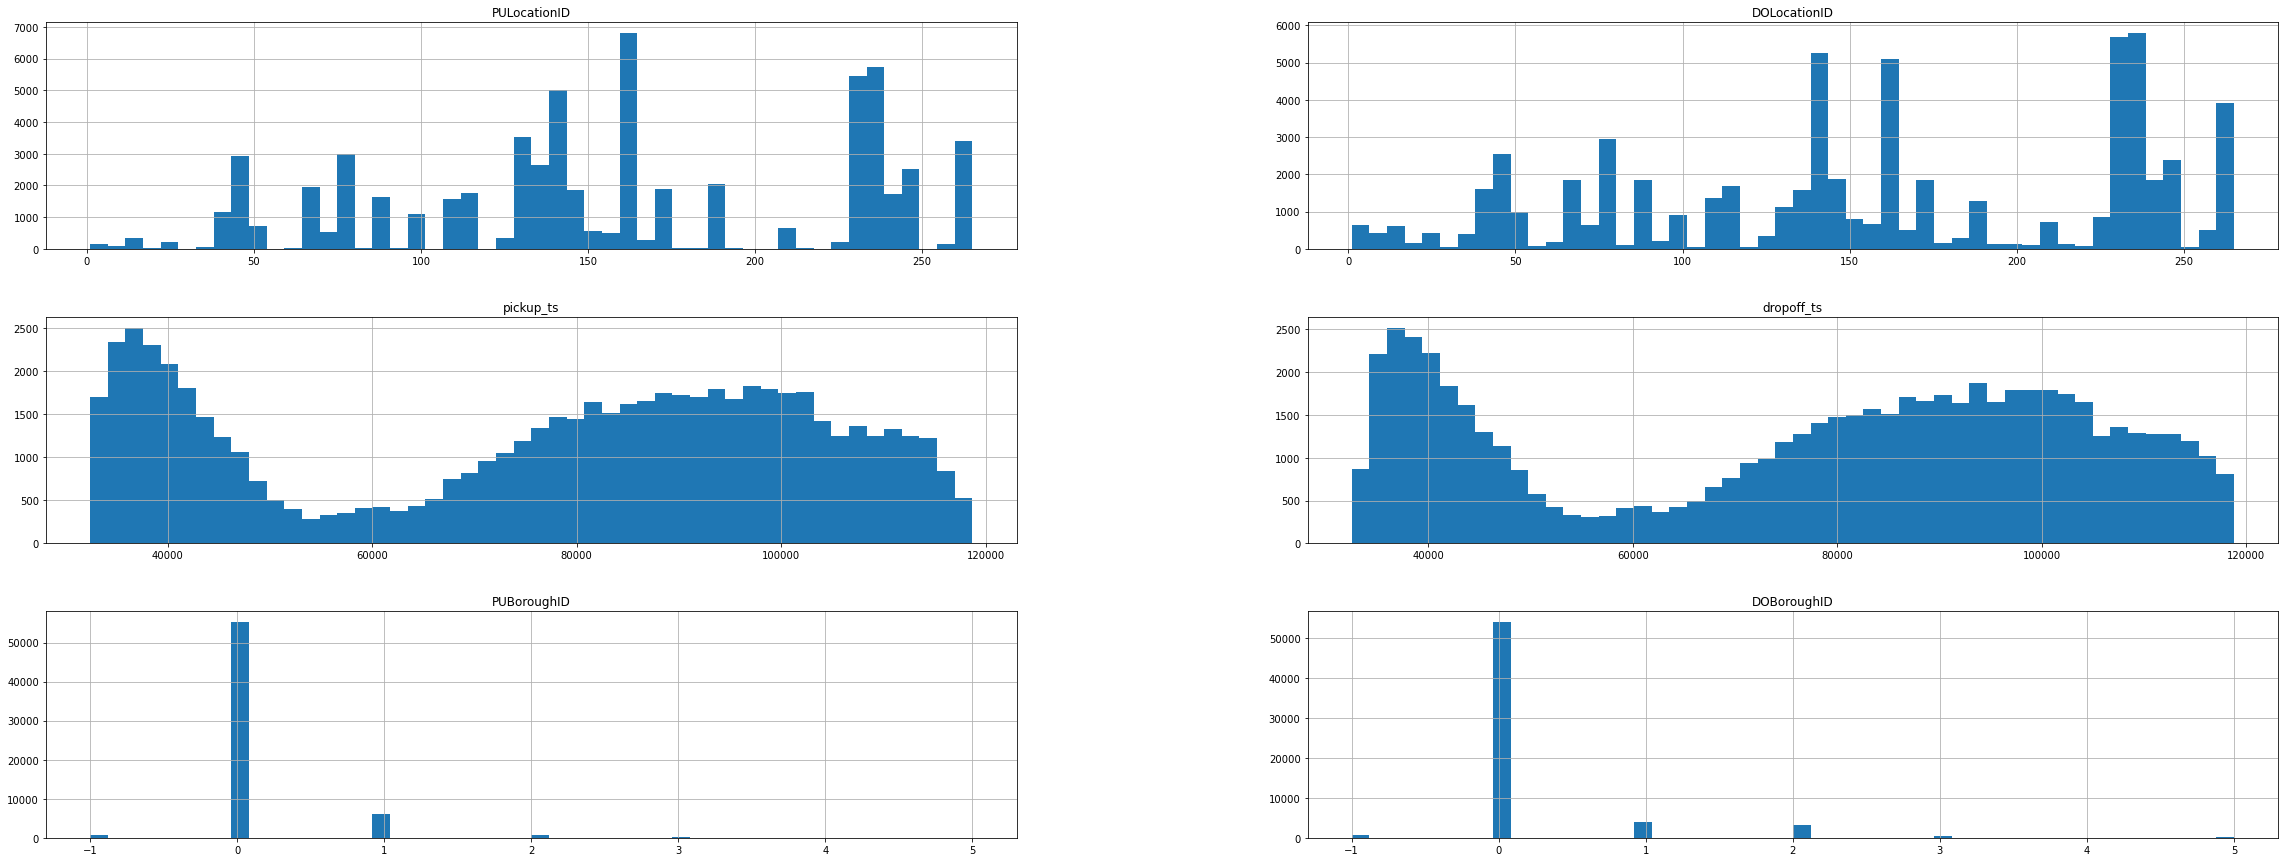

In [81]:
yellow_taxi_JAN_time_n_pos_df.hist(bins = 50, figsize = (40,15))
plt.show()

<AxesSubplot:>

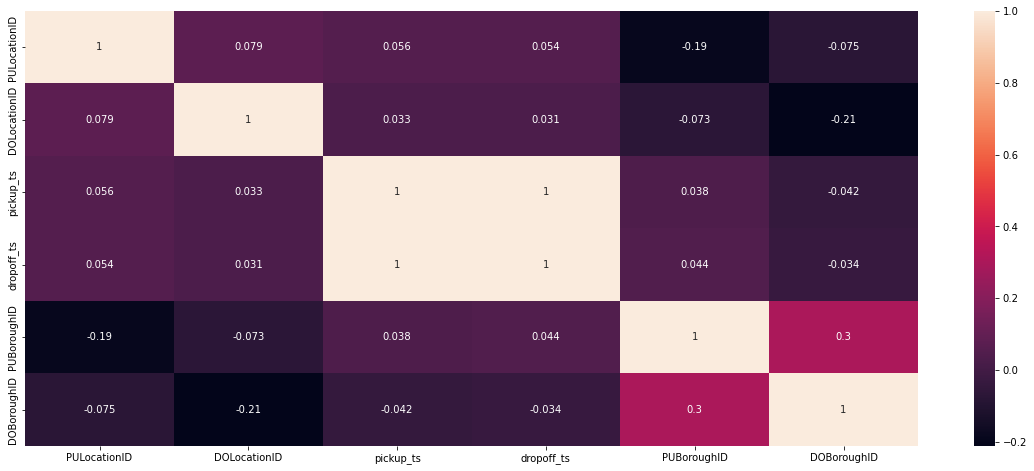

In [96]:
plt.figure(figsize = (20,8))
sns.heatmap(yellow_taxi_JAN_time_n_pos_df.corr(), annot = True)

<AxesSubplot:xlabel='PUBorough', ylabel='count'>

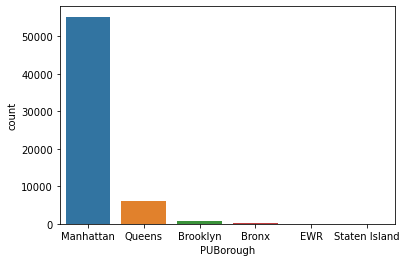

In [107]:
sns.countplot(data=yellow_taxi_JAN_time_n_pos_df, x='PUBorough')

/Users/min/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PUBoroughID', ylabel='PULocationID'>

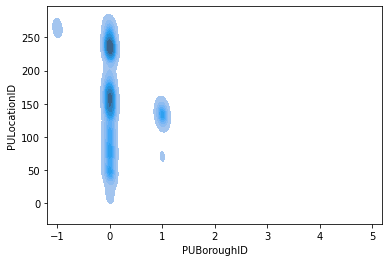

In [109]:
sns.kdeplot(yellow_taxi_JAN_time_n_pos_df['PUBoroughID'], yellow_taxi_JAN_time_n_pos_df['PULocationID'], shade=True)

<AxesSubplot:xlabel='PULocationID', ylabel='Density'>

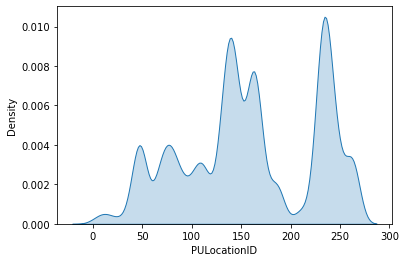

In [110]:
sns.kdeplot(yellow_taxi_JAN_time_n_pos_df['PULocationID'], shade=True)